<a href="https://colab.research.google.com/github/gjduart/Graph-Learning/blob/main/EXPLICANDO_GCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLICANDO GCN


Graph Info:
 Name: G
Type: Graph
Number of nodes: 6
Number of edges: 7
Average degree:   2.3333

Graph Nodes:  [(0, {'name': 0}), (1, {'name': 1}), (2, {'name': 2}), (3, {'name': 3}), (4, {'name': 4}), (5, {'name': 5})]


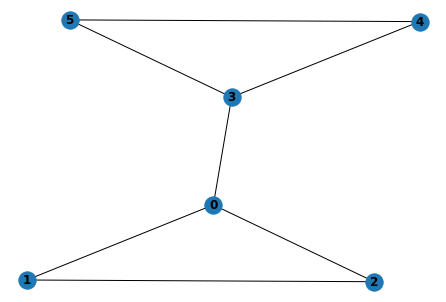

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


#Inicializando o Grafo G =(V,E)
G = nx.Graph(name='G')

#Criando os nos
#Nesse exemplo o Grafo vai consistir em 6 nis
#A cada nó é atribuído a um recurso de nó que corresponde ao nome do nó
for i in range(6):
    G.add_node(i, name=i)


#Definindo as arestas do grafo
edges = [(0,1),(0,2),(1,2),(0,3),(3,4),(3,5),(4,5)]
G.add_edges_from(edges)

#Informacoes do grafo
print('Graph Info:\n', nx.info(G))

#Conferindo os nos
print('\nGraph Nodes: ', G.nodes.data())

#Plotando o grafo
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

# SELF LOOPS

In [ ]:
# Pegando a matriz de Adjacencia A e a Matriz de Features e transformando numa matriz numpy
A = np.array(nx.attr_matrix(G, node_attr='name')[0])
X = np.array(nx.attr_matrix(G, node_attr='name')[1])
X = np.expand_dims(X,axis=1)

print('Shape de A: ', A.shape)
print('\nShape de X: ', X.shape)
print('\nMatriz de Adjacencia (A):\n', A)
print('\nMatriz de Features dos Nos (X):\n', X)

Shape de A:  (6, 6)

Shape de X:  (6, 1)

Matriz de Adjacencia (A):
 [[0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]

Matriz de Features dos Nos (X):
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:

AX = np.dot(A,X)
print("Dot product of A and X (AX):\n", AX)

Dot product of A and X (AX):
 [[6.]
 [2.]
 [1.]
 [9.]
 [8.]
 [7.]]


AX representa a soma das características dos nós vizinhos . Por exemplo, a primeira linha de AX corresponde à soma dos recursos dos nós conectados ao nó 0, que são os nós 1, 2 e 3. Isso nos dá uma ideia de como o mecanismo de propagação está acontecendo nos GCNs e como a conectividade do nó afeta o representação de recursos ocultos vistos por GCNs.

\begin{equation}

AX = 

\begin{bmatrix}
0 & 1 & 1 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 1 & 1 \\
0 & 0 & 0 & 1 & 0 & 1 \\
0 & 0 & 0 & 1 & 1 & 0 
\end{bmatrix}
\begin{bmatrix}
0 \\
1\\
2 \\ 
3 \\ 
4  \\
5 
\end{bmatrix}
 = 


\begin{bmatrix}
6\\
2\\
1\\
9\\
8\\
7
\end{bmatrix}

\end{equation}

In [ ]:
#Adicionando self lops
G_self_loops = G.copy()

self_loops = []
for i in range(G.number_of_nodes()):
    self_loops.append((i,i))

G_self_loops.add_edges_from(self_loops)

#Checando as arestas depois de adicionar os self Loops
print('Arestas de G com self-loops:\n', G_self_loops.edges)

#Matriz de Adjacencia e Matriz de Features com os self loops
A_hat = np.array(nx.attr_matrix(G_self_loops, node_attr='name')[0])
print('Matriz de Adjacência de auto-loops G adicionados (A_hat):\n', A_hat)

#Calculando o Produto de A_hat e X
AX = np.dot(A_hat, X)
print('AX:\n', AX)


Arestas de G com self-loops:
 [(0, 1), (0, 2), (0, 3), (0, 0), (1, 2), (1, 1), (2, 2), (3, 4), (3, 5), (3, 3), (4, 5), (4, 4), (5, 5)]
Matriz de Adjacência de auto-loops G adicionados (A_hat):
 [[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]
AX:
 [[ 6.]
 [ 3.]
 [ 3.]
 [12.]
 [12.]
 [12.]]


\begin{equation*}

\hat{A}X = 
\begin{bmatrix}
1 & 1 & 1 & 1 & 0 & 0 \\
1 & 1 & 1 & 0 & 0 & 0 \\
1 & 1 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 1 & 1 \\
0 & 0 & 0 & 1 & 1 & 1 \\
0 & 0 & 0 & 1 & 1 & 1
\end{bmatrix}

 
\begin{bmatrix}
0 \\
1\\
2 \\ 
3 \\ 
4  \\
5 
\end{bmatrix}
 = 


\begin{bmatrix}
6\\
3\\
3\\
12\\
12\\
12
\end{bmatrix}

\end{equation*}

# NORMALIZACAO


Features Normalizadas = $D^{-1} AX$ <br >
tendo D como : Matriz de Graus


In [ ]:
#Vamos ter a matriz de grau do nosso grafo G com self Loops
Deg_Mat = G_self_loops.degree()
print('Matriz de Grau (D): ', Deg_Mat)


#Converter a matriz de grau para uma matriz NxN onde N e o numero de Nos
D = np.diag([deg for (n,deg) in list(Deg_Mat)])
print('Matriz de Grau NxN (D):\n', D)

#Calculando o Inverso da matriz de grau
D_inv = np.linalg.inv(D)
print('Inverso da matriz de grau D:\n', D_inv)

#realizando produto para normalizacao
DAX = np.dot(D_inv,AX)
print('DAX:\n', DAX)

Matriz de Grau (D):  [(0, 5), (1, 4), (2, 4), (3, 5), (4, 4), (5, 4)]
Matriz de Grau NxN (D):
 [[5 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
Inverso da matriz de grau D:
 [[0.2  0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.2  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.25]]
DAX:
 [[1.2 ]
 [0.75]
 [0.75]
 [2.4 ]
 [3.  ]
 [3.  ]]


Normalizacao = $D^{-1} AX$ <br > mudar para <br > Normalizacao = $D^{-(\frac{1}{2})} A D^{-(\frac{1}{2})} $

In [ ]:
D_half_norm = fractional_matrix_power(D, -0.5)
DADX = D_half_norm.dot(A_hat).dot(D_half_norm).dot(X)
print('DADX:\n', DADX)

DADX:
 [[1.27082039]
 [0.75      ]
 [0.75      ]
 [2.61246118]
 [2.92082039]
 [2.92082039]]


In [ ]:
#Inicializando os pesos
np.random.seed(77777)
n_h = 4 #numero de neuronios nas camadas ocultas
n_y = 2 #numero de neuronios na camada de saida
W0 = np.random.randn(X.shape[1],n_h) * 0.01
W1 = np.random.randn(n_h,n_y) * 0.01

#Funcao de ativacao relu
def relu(x):
    return np.maximum(0,x)


#GCN LAYER

def gcn(A,H,W):
    I = np.identity(A.shape[0]) #Criando a Matriz identidade de A
    A_hat = A + I #adicionando self Loops pro A
    D = np.diag(np.sum(A_hat, axis=0)) #Criando a Matriz diagonal de A
    D_half_norm = fractional_matrix_power(D, -0.5) #calculate D to the power of -0.5
    eq = D_half_norm.dot(A_hat).dot(D_half_norm).dot(H).dot(W)
    return relu(eq)


#Do forward propagation
H1 = gcn(A,X,W0)
H2 = gcn(A,H1,W1)
print('Features Representation from GCN output:\n', H2)

Features Representation from GCN output:
 [[0.00027758 0.        ]
 [0.00017298 0.        ]
 [0.00017298 0.        ]
 [0.00053017 0.        ]
 [0.00054097 0.        ]
 [0.00054097 0.        ]]


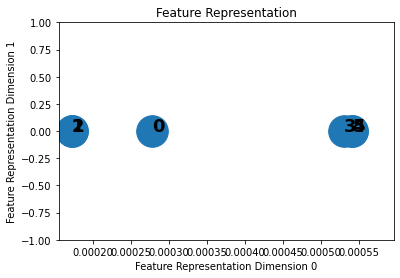

In [ ]:
def plot_features(H2):
    #Plot the features representation
    x = H2[:,0]
    y = H2[:,1]

    size = 1000

    plt.scatter(x,y,size)
    plt.xlim([np.min(x)*0.9, np.max(x)*1.1])
    plt.ylim([-1, 1])
    plt.xlabel('Feature Representation Dimension 0')
    plt.ylabel('Feature Representation Dimension 1')
    plt.title('Feature Representation')

    for i,row in enumerate(H2):
        str = "{}".format(i)
        plt.annotate(str, (row[0],row[1]),fontsize=18, fontweight='bold')

    plt.show()


plot_features(H2)